In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

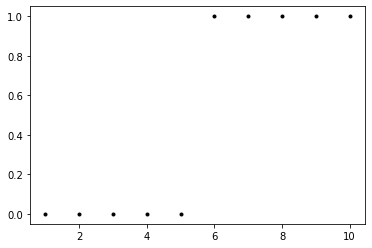

In [3]:
data = {
    "x" : np.arange(1, 11),
    "y" : [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
plt.plot(df["x"], df["y"], "k.")

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [5]:
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

In [8]:
modelA.fit(df[["x"]], df["y"])
modelB.fit(df[["x"]], df["y"])
modelC.fit(df[["x"]], df["y"])
modelD.fit(df[["x"]], df["y"])

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
df["y'A"] = modelA.predict(df[["x"]])
df["y'B"] = modelB.predict(df[["x"]])
df["y'C"] = modelC.predict(df[["x"]])
df["y'D"] = modelD.predict(df[["x"]])
df

,x,y,y'A,y'B,y'C,y'D
0,1,0,-0.181818,-0.173653,0.363636,0.114286
1,2,0,-0.030303,-0.023952,0.393939,0.200000
2,3,0,0.121212,0.125749,0.424242,0.285714
3,4,0,0.272727,0.275449,0.454545,0.371429
4,5,0,0.424242,0.425150,0.484848,0.457143
5,6,1,0.575758,0.574850,0.515152,0.542857
6,7,1,0.727273,0.724551,0.545455,0.628571
7,8,1,0.878788,0.874251,0.575758,0.714286
8,9,1,1.030303,1.023952,0.606061,0.800000
9,10,1,1.181818,1.173653,0.636364,0.885714


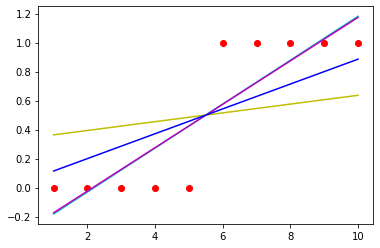

In [12]:
plt.plot(df["x"], df["y"], "ro")
plt.plot(df["x"], df["y'A"], "c-")
plt.plot(df["x"], df["y'B"], "m-")
plt.plot(df["x"], df["y'C"], "y-")
plt.plot(df["x"], df["y'D"], "b-")

plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [23]:
pipe = make_pipeline(
    PolynomialFeatures(8, include_bias= False),
    LinearRegression()
)
pipe.fit(df[["x"]], df["y"])
df["y'poly"] = pipe.predict(df[["x"]])
df

,x,y,y'A,y'B,y'C,y'D,y'poly
0,1,0,-0.181818,-0.173653,0.363636,0.114286,0.001440
1,2,0,-0.030303,-0.023952,0.393939,0.200000,-0.012958
2,3,0,0.121212,0.125749,0.424242,0.285714,0.051830
3,4,0,0.272727,0.275449,0.454545,0.371429,-0.120938
4,5,0,0.424242,0.425150,0.484848,0.457143,0.181407
5,6,1,0.575758,0.574850,0.515152,0.542857,0.818593
6,7,1,0.727273,0.724551,0.545455,0.628571,1.120938
7,8,1,0.878788,0.874251,0.575758,0.714286,0.948169
8,9,1,1.030303,1.023952,0.606061,0.800000,1.012958
9,10,1,1.181818,1.173653,0.636364,0.885714,0.998560


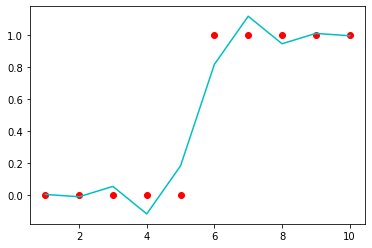

In [24]:
plt.plot(df["x"], df["y"], "ro")
plt.plot(df["x"], df["y'poly"], "c-")